In [ ]:
### GPU configuration
! nvidia-smi

Thu Aug 18 17:21:35 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -u "/content/drive/MyDrive/OCT Project/OCT Code & Dataset/R-OCT V3 2018 Dataset.zip" -d "/content/Unzipped_OCT_Dataset"

print('\n\ndone!')

Streaming output truncated to the last 5000 lines.
  inflating: /content/Unzipped_OCT_Dataset/Resize Trained NORMAL/image5500.jpeg  
  inflating: /content/Unzipped_OCT_Dataset/Resize Trained NORMAL/image5501.jpeg  
  inflating: /content/Unzipped_OCT_Dataset/Resize Trained NORMAL/image5502.jpeg  
  inflating: /content/Unzipped_OCT_Dataset/Resize Trained NORMAL/image5503.jpeg  
  inflating: /content/Unzipped_OCT_Dataset/Resize Trained NORMAL/image5504.jpeg  
  inflating: /content/Unzipped_OCT_Dataset/Resize Trained NORMAL/image5505.jpeg  
  inflating: /content/Unzipped_OCT_Dataset/Resize Trained NORMAL/image5506.jpeg  
  inflating: /content/Unzipped_OCT_Dataset/Resize Trained NORMAL/image5507.jpeg  
  inflating: /content/Unzipped_OCT_Dataset/Resize Trained NORMAL/image5508.jpeg  
  inflating: /content/Unzipped_OCT_Dataset/Resize Trained NORMAL/image5509.jpeg  
  inflating: /content/Unzipped_OCT_Dataset/Resize Trained NORMAL/image551.jpeg  
  inflating: /content/Unzipped_OCT_Dataset/Resiz

In [ ]:
import cv2
import numpy as np
import glob
import os

In [ ]:
################################################################################################

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
import os

input_folder="/content/Unzipped_OCT_Dataset"


output="/content/V3_OCT_Splitted_ds"



splitfolders.ratio(input_folder, output, seed=42, ratio=(.75,.1,.15)) ### train 75%, val 10%, test 15%


Copying files: 109308 files [01:36, 1129.09 files/s]


In [ ]:
####### transfer learning model

################# import various transfer elarning models ###################

from tensorflow.keras.applications.inception_v3 import InceptionV3
#from tensorflow.keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications.vgg19 import VGG19
#from tensorflow.keras.applications import Xception

#############################################################################

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger

import tensorflow as tf


########
IMAGE_SIZE = [224,224]
CLASS=4
######




mod = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#mod = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#mod = DenseNet201(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#mod = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#mod = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in mod.layers:
    layer.trainable = False

x = Flatten()(mod.output)

prediction = Dense(CLASS, activation='softmax')(x)

model = Model(inputs=mod.input, outputs=prediction)

############################ optimizer and learning rate ##################

adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(
  loss='categorical_crossentropy', ### for multi class calsification
  #loss='binary_crossentropy', ### for binary calsification
  optimizer=adam,
  metrics=['accuracy']
)

#########################################################################


model.optimizer.get_config()
print("\n\n")
model.summary()

87910968/87910968 [==============================] - 2s 0us/step



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)               

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 oling2D)                                                                                         
                                                                                                  
 conv2d_12 (Conv2D)             (None, 25, 25, 64)   16384       ['mixed0[0][0]']                 
                                                                                                  
 conv2d_14 (Conv2D)             (None, 25, 25, 64)   76800       ['activation_13[0][0]']          
                                                                                                  
 conv2d_17 (Conv2D)             (None, 25, 25, 96)   82944       ['activation_16[0][0]']          
                                                                                                  
 conv2d_18 (Conv2D)             (None, 25, 25, 64)   16384       ['average_pooling2d_1[0][0]']    
                                                                                                  
 batch_nor

In [ ]:
### image datagenerator

train_datagen = ImageDataGenerator(shear_range = 0.2,
                                   zoom_range = 0.2,
                                   #brightness_range=(0.4, 0.7),
                                   #width_shift_range=0.2,
                                   #height_shift_range=0.2,
                                   vertical_flip= True,
                                   horizontal_flip = True

                                   )

val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/V3_OCT_Splitted_ds/train',  
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

val_set = val_datagen.flow_from_directory('/content/V3_OCT_Splitted_ds/val',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory('/content/V3_OCT_Splitted_ds/test',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')





Found 81979 images belonging to 4 classes.
Found 10929 images belonging to 4 classes.
Found 16400 images belonging to 4 classes.


In [ ]:
from PIL import Image

filepath = "/content/drive/MyDrive/OCT Project/OCT Code & Dataset/h5/Inceptionv3.h5"


checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,save_weights_only=True,
                        save_best_only=True, mode='max')

log_csv = CSVLogger('/content/drive/MyDrive/OCT Project/OCT Code & Dataset/csv/Inceptionv3.csv', separator=',', append=False)
    
    
callbacks_list = [checkpoint1,log_csv]


r = model.fit_generator(
    training_set,
    epochs=100,
    validation_data=val_set,
    steps_per_epoch = len(training_set),
    validation_steps=len(val_set),
   # callbacks=callbacks_list,
    shuffle=False
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100


UnimplementedError: ignored

In [ ]:
model.load_weights('/content/drive/MyDrive/OCT Project/OCT Code & Dataset/h5/Inceptionv3.h5')  ### load weights from h5 file

preds = model.evaluate_generator(test_set)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

OSError: ignored

Total variable denoising

In [1]:
%%capture
!pip install kornia

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import kornia as K

In [3]:
import numpy as np 
import pandas as pd 
import cv2 
import matplotlib.pyplot as plt 
import os 
import shutil 
from PIL import Image  
from PIL import Image,ImageEnhance 
from skimage import metrics 
from skimage.metrics import structural_similarity as ssim 
%matplotlib inline

In [4]:
def imshow(input: torch.Tensor):
    out = torchvision.utils.make_grid(input, nrow=2, padding=5)
    out_np: np.ndarray = K.utils.tensor_to_image(out)
    plt.imshow(out_np)
    plt.axis('off')
    plt.show()

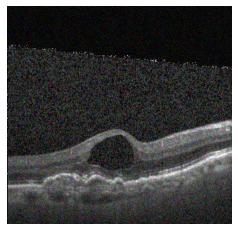

In [5]:
# read the image with OpenCV
img: np.ndarray = cv2.imread('/content/crop 3.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) / 255.0
img = img + np.random.normal(loc=0.0, scale=0.1, size=img.shape)
img = np.clip(img, 0.0, 1.0)


# convert to torch tensor
noisy_image: torch.tensor = K.utils.image_to_tensor(img).squeeze()  # CxHxW
imshow(noisy_image)

In [6]:
# define the total variation denoising network
class TVDenoise(torch.nn.Module):
    def __init__(self, noisy_image):
        super(TVDenoise, self).__init__()
        self.l2_term = torch.nn.MSELoss(reduction='mean')
        self.regularization_term = K.losses.TotalVariation()
        # create the variable which will be optimized to produce the noise free image
        self.clean_image = torch.nn.Parameter(data=noisy_image.clone(), requires_grad=True)
        self.noisy_image = noisy_image

    def forward(self):
        return self.l2_term(self.clean_image, self.noisy_image) + 0.0001 * self.regularization_term(self.clean_image)

    def get_clean_image(self):
        return self.clean_image


tv_denoiser = TVDenoise(noisy_image)

# define the optimizer to optimize the 1 parameter of tv_denoiser
optimizer = torch.optim.SGD(tv_denoiser.parameters(), lr=0.1, momentum=0.9)

In [7]:
num_iters: int = 500
for i in range(num_iters):
    optimizer.zero_grad()
    loss = tv_denoiser()
    if i % 50 == 0:
        print("Loss in iteration {} of {}: {:.3f}".format(i, num_iters, loss.item()))
    loss.backward()
    optimizer.step()

Loss in iteration 0 of 500: 15.349
Loss in iteration 50 of 500: 13.239
Loss in iteration 100 of 500: 11.000
Loss in iteration 150 of 500: 9.091
Loss in iteration 200 of 500: 7.481
Loss in iteration 250 of 500: 6.137
Loss in iteration 300 of 500: 5.025
Loss in iteration 350 of 500: 4.115
Loss in iteration 400 of 500: 3.381
Loss in iteration 450 of 500: 2.793


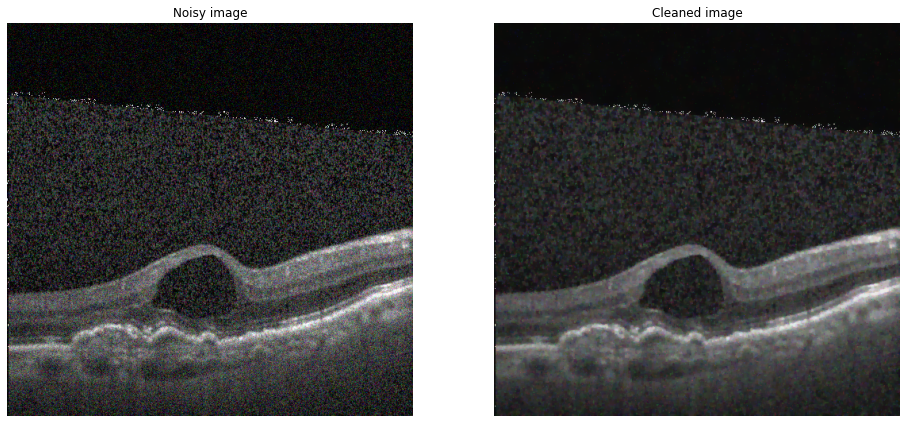

In [8]:
# convert back to numpy
img_clean: np.ndarray = K.utils.tensor_to_image(tv_denoiser.get_clean_image())
cv2.imwrite('/content/processed_image.png', img_clean)
# Create the plot
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('Noisy image')
axs[0].imshow(img)

axs[1].axis('off')
axs[1].set_title('Cleaned image')
axs[1].imshow(img_clean)

plt.show()

In [11]:
ref_img = cv2.imread("/content/crop 3.jpeg",0) #original image 
img = cv2.imread("/content/processed_image.png",0)  #noisy image 
 
cv2.imwrite("/content/aaa/a.png",ref_img)  #save original image again 
cv2.imwrite("/content/aaa/b.png",img)   #save noisy image again 
 
ref_img = cv2.imread("/content/aaa/a.png",1)  #original image 
img = cv2.imread("/content/aaa/b.png",1)  #noisy image 


mse_skimg = metrics.mean_squared_error(ref_img, img) 
print("MSE: based on scikit-image = ", mse_skimg/100) 
 
 
psnr_skimg = metrics.peak_signal_noise_ratio(ref_img, img, data_range=None) 
print("PSNR: based on scikit-image = ", psnr_skimg) 
 
ssim_skimg = ssim(ref_img, img, 
                  data_range = img.max() - img.min(),  
                  multichannel = True) 
print("SSIM: based on scikit-image = ", ssim_skimg)
rmse_f = np.sqrt(mse_skimg/100)
print("RMSE:", rmse_f)

MSE: based on scikit-image =  34.690178301411294
PSNR: based on scikit-image =  12.728738288229092
SSIM: based on scikit-image =  0.21895356392485063
RMSE: 5.889836865432802
